In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
def rename_cols(dataframe): 
    dataframe.rename(columns = {"Read Date":"date"},inplace = True)

In [3]:
def plot_daily_data(dataframe): 
    day = [i for i in range(len(dataframe))]
    plt.bar(day,dataframe.kW)
    plt.show()

In [4]:
def add_occupancy(dataframe): 
    my_l = [0 for i in range(len(dataframe))]
    for i in range(len(dataframe)): 
        if i >= 4 and i < 77: 
            my_l[i] = 1
        elif i >= 234 and i < 329: 
            my_l[i] = 1
        elif i >= 374 and i < 402: 
            my_l[i] = 1/2
        elif i >= 402: 
            my_l[i] = 1
    dataframe['occupied'] = my_l
    print(dataframe)
    return dataframe 

In [5]:
def plot_daily_data_capacity(dataframe,capacity):
    day = [i for i in range(len(dataframe))]
    dataframe['day'] = day
    dataframe['kw_per_person'] = dataframe.kW/capacity
    dataframe['week'] = [i//7 for i in range(len(dataframe))]
    plt.bar(day,dataframe.kw_per_person)
    plt.show()

In [6]:
def merge_temp_building(dataframe,temp): 
    dataframe['Date'] = pd.to_datetime(dataframe['date'])
    dataframe.drop(columns="date", inplace = True)
    new = dataframe.merge(temp, how='left', on = 'Date')
    return new

In [7]:
def remove_nulls(dataframe): 
    dataframe = dataframe[dataframe.kW.notnull()]
    return dataframe

In [8]:
def call_functions(dataframe,capacity): 
    no_nulls = remove_nulls(dataframe)
    rename_cols(no_nulls)
    occupied = add_occupancy(no_nulls)
    occupied.reset_index(drop=True,inplace = True)
    plot_daily_data_capacity(occupied,capacity)
    return occupied

## By Capacity

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-4-4f218c511d7d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['occupied'] = my_l
<ipython-input-5-408aae129c80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

                      date         kWh       kW  occupied
0     1/1/2020 12:00:00 AM  1,439.9760   80.640       0.0
1     1/2/2020 12:00:00 AM  1,325.8080   68.064       0.0
2     1/4/2020 12:00:00 AM  1,340.0880   71.040       0.0
3     1/5/2020 12:00:00 AM  1,432.7040   69.120       0.0
4     1/6/2020 12:00:00 AM  1,570.9921  101.760       1.0
..                     ...         ...      ...       ...
816  4/29/2021 12:00:00 AM  1,966.9440  124.800       1.0
818  4/30/2021 12:00:00 AM  1,736.1121  128.640       1.0
820   5/1/2021 12:00:00 AM  1,674.6960  127.680       1.0
822   5/2/2021 12:00:00 AM  1,760.7360  107.520       1.0
824   5/3/2021 12:00:00 AM  1,938.4561  118.080       1.0

[488 rows x 4 columns]


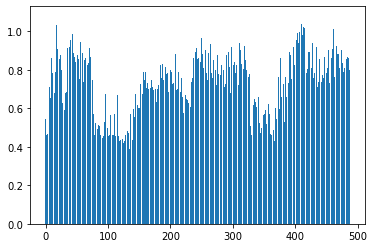

In [9]:
pearl = pd.read_csv("pearl_daily.csv")
pearl = call_functions(pearl,148)

In [10]:
pearl

,date,kWh,kW,occupied,day,kw_per_person,week
0,1/1/2020 12:00:00 AM,"1,439.9760",80.640,0.0,0,0.544865,0
1,1/2/2020 12:00:00 AM,"1,325.8080",68.064,0.0,1,0.459892,0
2,1/4/2020 12:00:00 AM,"1,340.0880",71.040,0.0,2,0.480000,0
3,1/5/2020 12:00:00 AM,"1,432.7040",69.120,0.0,3,0.467027,0
4,1/6/2020 12:00:00 AM,"1,570.9921",101.760,1.0,4,0.687568,0
...,...,...,...,...,...,...,...
483,4/29/2021 12:00:00 AM,"1,966.9440",124.800,1.0,483,0.843243,69
484,4/30/2021 12:00:00 AM,"1,736.1121",128.640,1.0,484,0.869189,69
485,5/1/2021 12:00:00 AM,"1,674.6960",127.680,1.0,485,0.862703,69
486,5/2/2021 12:00:00 AM,"1,760.7360",107.520,1.0,486,0.726486,69


In [11]:
model = smf.ols(formula = 'kw_per_person ~ day', data = pearl).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          kw_per_person   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     35.01
Date:                Thu, 06 May 2021   Prob (F-statistic):           6.19e-09
Time:                        09:37:00   Log-Likelihood:                 227.46
No. Observations:                 488   AIC:                            -450.9
Df Residuals:                     486   BIC:                            -442.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6701      0.014     48.725      0.000       0.643       0.697
day            0.0003   4.89e-05      5.917      0.000       0.000       0.000
==============================================================================
Omnibus:                       19.916   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.412
Skew:                          -0.246   Prob(JB):                      0.00202
Kurtosis:                       2.393   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
breck = pd.read_csv("breck_daily.csv")
breck = breck[breck.kW.notnull()]
rename_cols(breck)
breck

,date,kWh,kW
0,1/1/2020 12:00:00 AM,991.8840,44.640
1,1/2/2020 12:00:00 AM,930.1320,43.680
2,1/3/2020 12:00:00 AM,862.2360,40.320
3,1/4/2020 12:00:00 AM,"1,003.2240",59.520
4,1/5/2020 12:00:00 AM,"1,217.2321",66.240
...,...,...,...
817,4/29/2021 12:00:00 AM,"1,275.9960",70.080
819,4/30/2021 12:00:00 AM,"1,143.5520",59.520
821,5/1/2021 12:00:00 AM,"1,070.7000",55.200
823,5/2/2021 12:00:00 AM,"1,196.7000",65.760


In [13]:
type(breck)

pandas.core.frame.DataFrame

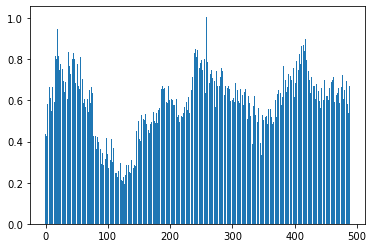

In [14]:
plot_daily_data_capacity(breck,102)

In [15]:
yerkes = pd.read_csv('yerkes_daily.csv')
yerkes = yerkes[yerkes.kW.notnull()]
rename_cols(yerkes)
yerkes

,date,kWh,kW
0,1/1/2020 12:00:00 AM,792.2000,36.00
1,1/2/2020 12:00:00 AM,782.0600,36.80
2,1/4/2020 12:00:00 AM,776.4600,35.20
3,1/5/2020 12:00:00 AM,816.2400,49.60
4,1/6/2020 12:00:00 AM,927.6400,56.00
...,...,...,...
816,4/29/2021 12:00:00 AM,"1,220.9800",65.60
818,4/30/2021 12:00:00 AM,"1,185.0800",69.52
820,5/1/2021 12:00:00 AM,"1,115.9800",62.40
822,5/2/2021 12:00:00 AM,"1,155.4200",61.60


In [16]:
#yerkes['Date'] = pd.to_datetime(yerkes['date'])
#yerkes.drop(columns="date", inplace = True)
#yerkes


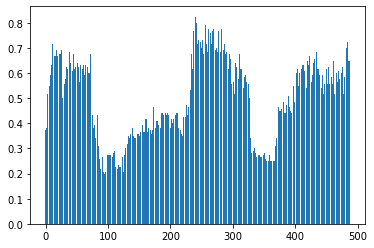

In [17]:
plot_daily_data_capacity(yerkes,96)

In [18]:
brock = pd.read_csv('brock_daily.csv')
brock = brock[brock.kW.notnull()]
brock.drop(586,inplace=True)
rename_cols(brock)

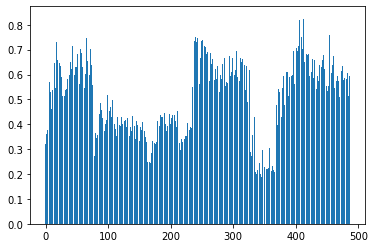

In [19]:
plot_daily_data_capacity(brock,124)

In [20]:
temp = pd.read_csv("temperature.csv")
temp

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Danville, KY, United States",01/01/2020,49.1,35.2,41.1,30.4,NaN,0.00,0.0,0.0,13.6,219.54,20.8,9.9,23.8,56.65,Clear
1,"Danville, KY, United States",01/02/2020,53.1,38.3,46.7,32.0,NaN,0.17,0.0,0.0,14.4,171.38,27.7,9.6,57.6,67.27,"Rain, Partially cloudy"
2,"Danville, KY, United States",01/03/2020,54.7,51.3,53.1,NaN,NaN,0.67,0.0,0.0,14.5,211.58,32.2,5.9,68.5,89.92,"Rain, Partially cloudy"
3,"Danville, KY, United States",01/04/2020,50.8,36.1,41.8,27.7,NaN,0.06,0.0,0.0,15.4,283.71,29.2,8.7,69.2,76.20,"Rain, Partially cloudy"
4,"Danville, KY, United States",01/05/2020,48.8,31.1,39.7,23.9,NaN,0.00,0.0,0.0,18.1,233.54,27.3,9.9,21.8,63.32,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,"Danville, KY, United States",04/29/2021,67.8,55.0,64.6,NaN,NaN,0.44,0.0,0.0,16.8,229.96,30.1,8.5,77.3,88.30,"Rain, Overcast"
485,"Danville, KY, United States",04/30/2021,71.5,48.8,59.5,45.9,NaN,0.00,0.0,0.0,17.7,295.17,33.0,8.9,7.3,59.12,Clear
486,"Danville, KY, United States",05/01/2021,70.6,36.2,54.8,32.6,NaN,0.00,0.0,0.0,10.7,194.79,18.3,9.9,0.0,49.25,Clear
487,"Danville, KY, United States",05/02/2021,75.0,53.0,63.6,NaN,NaN,0.04,0.0,0.0,13.1,178.83,24.2,9.9,39.4,54.74,"Rain, Partially cloudy"


In [21]:
temp['Date'] = pd.to_datetime(temp['Date time'])

In [22]:
temp.drop(columns={"Date time",'Wind Chill','Heat Index','Precipitation','Snow','Snow Depth','Wind Speed',
          'Wind Direction','Wind Gust', 'Visibility','Cloud Cover','Relative Humidity','Conditions', 'Name'}, inplace = True)

In [23]:
temp

,Maximum Temperature,Minimum Temperature,Temperature,Date
0,49.1,35.2,41.1,2020-01-01
1,53.1,38.3,46.7,2020-01-02
2,54.7,51.3,53.1,2020-01-03
3,50.8,36.1,41.8,2020-01-04
4,48.8,31.1,39.7,2020-01-05
...,...,...,...,...
484,67.8,55.0,64.6,2021-04-29
485,71.5,48.8,59.5,2021-04-30
486,70.6,36.2,54.8,2021-05-01
487,75.0,53.0,63.6,2021-05-02


In [24]:
#new = yerkes.merge(temp, how='left', on = 'Date')
#new

In [25]:
yerkes = merge_temp_building(yerkes,temp)
yerkes.head()

,kWh,kW,day,kw_per_person,week,Date,Maximum Temperature,Minimum Temperature,Temperature
0,792.2000,36.0,0,0.375000,0,2020-01-01,49.1,35.2,41.1
1,782.0600,36.8,1,0.383333,0,2020-01-02,53.1,38.3,46.7
2,776.4600,35.2,2,0.366667,0,2020-01-04,50.8,36.1,41.8
3,816.2400,49.6,3,0.516667,0,2020-01-05,48.8,31.1,39.7
4,927.6400,56.0,4,0.583333,0,2020-01-06,49.0,30.0,38.9


In [26]:
pearl = merge_temp_building(pearl,temp)
pearl.head()

,kWh,kW,occupied,day,kw_per_person,week,Date,Maximum Temperature,Minimum Temperature,Temperature
0,"1,439.9760",80.640,0.0,0,0.544865,0,2020-01-01,49.1,35.2,41.1
1,"1,325.8080",68.064,0.0,1,0.459892,0,2020-01-02,53.1,38.3,46.7
2,"1,340.0880",71.040,0.0,2,0.480000,0,2020-01-04,50.8,36.1,41.8
3,"1,432.7040",69.120,0.0,3,0.467027,0,2020-01-05,48.8,31.1,39.7
4,"1,570.9921",101.760,1.0,4,0.687568,0,2020-01-06,49.0,30.0,38.9


In [27]:
brock = merge_temp_building(brock,temp)

In [28]:
brock

,kWh,kW,day,kw_per_person,week,Date,Maximum Temperature,Minimum Temperature,Temperature
0,765.0720,39.84,0,0.321290,0,2020-01-01,49.1,35.2,41.1
1,721.3680,44.64,1,0.360000,0,2020-01-02,53.1,38.3,46.7
2,736.1640,40.80,2,0.329032,0,2020-01-04,50.8,36.1,41.8
3,822.1680,46.56,3,0.375484,0,2020-01-05,48.8,31.1,39.7
4,"1,012.2360",59.04,4,0.476129,0,2020-01-06,49.0,30.0,38.9
...,...,...,...,...,...,...,...,...,...
482,"1,123.2480",73.92,482,0.596129,68,2021-04-29,67.8,55.0,64.6
483,"1,073.3521",75.36,483,0.607742,69,2021-04-30,71.5,48.8,59.5
484,972.8880,63.84,484,0.514839,69,2021-05-01,70.6,36.2,54.8
485,986.1000,62.88,485,0.507097,69,2021-05-02,75.0,53.0,63.6


In [29]:
breck = merge_temp_building(breck,temp)
breck

,kWh,kW,day,kw_per_person,week,Date,Maximum Temperature,Minimum Temperature,Temperature
0,991.8840,44.640,0,0.437647,0,2020-01-01,49.1,35.2,41.1
1,930.1320,43.680,1,0.428235,0,2020-01-02,53.1,38.3,46.7
2,862.2360,40.320,2,0.395294,0,2020-01-03,54.7,51.3,53.1
3,"1,003.2240",59.520,3,0.583529,0,2020-01-04,50.8,36.1,41.8
4,"1,217.2321",66.240,4,0.649412,0,2020-01-05,48.8,31.1,39.7
...,...,...,...,...,...,...,...,...,...
484,"1,275.9960",70.080,484,0.687059,69,2021-04-29,67.8,55.0,64.6
485,"1,143.5520",59.520,485,0.583529,69,2021-04-30,71.5,48.8,59.5
486,"1,070.7000",55.200,486,0.541176,69,2021-05-01,70.6,36.2,54.8
487,"1,196.7000",65.760,487,0.644706,69,2021-05-02,75.0,53.0,63.6
